<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/Week6_VicenteDeLeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')
X = df.iloc[:, [3,4]].values

# Hierarchical Clustering:

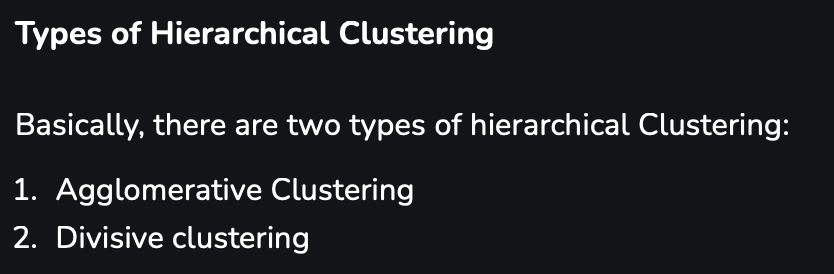

Hierarchical clustering is a connectivity-based clustering model that groups the data points together that are close to each other based on the measure of similarity or distance. The assumption is that data points that are close to each other are more similar or related than data points that are farther apart.

## Dendogram

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

Ward linkage explained (very useful): https://www.statistics.com/glossary/wards-linkage/#:~:text=The%20linkage%20function%20specifying%20the,in%20ESS%20at%20each%20step.

Ward will merge the pair of clusters that leads to the smallest possible increase in the total within cluster variance at each step.

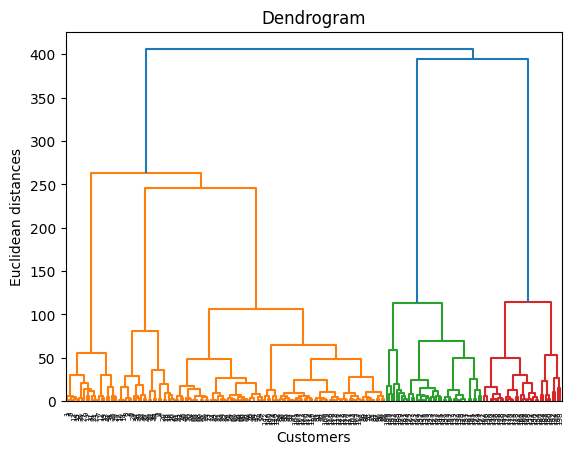

In [5]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = 'ward')) # ward -> for hierarchical clustering

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Agglomerative Clustering

Scikit Learn: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html

It is also known as the bottom up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data.

In [7]:
# hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') -> outdated due to sckikit learn versions (see documentation)
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

Visualization:

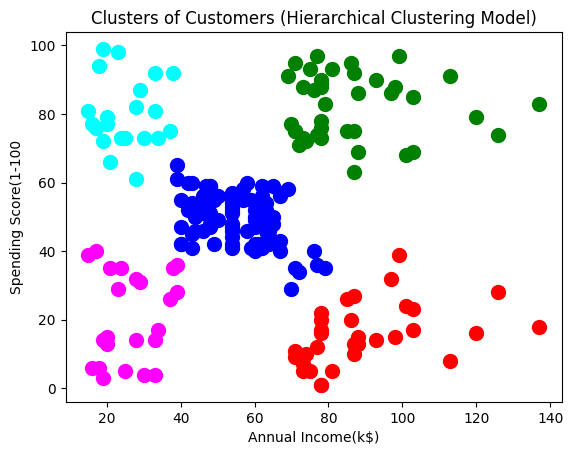

In [8]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

The above image is a scatter plot that visualizes 5 clusters of customers, grouped by annual income and spending score using hierarchical clustering (Wards method).

- Red Cluster: High income, low to moderate spending.
- Blue Cluster: Moderate income, moderate spending.
- Green Cluster: High income, high spending.
- Light Blue Cluster: Low income, high spending.
- Pink/Purple Cluster: Low income, low spending.

# K-Means Clustering


Is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.

In some cases, K is not clearly defined, and we have to think about the optimal number of K. K Means clustering performs best data is well separated. When data points overlapped this clustering is not suitable. K Means is faster as compare to other clustering technique. It provides strong coupling between the data points. K Means cluster do not provide clear information regarding the quality of clusters. Different initial assignment of cluster centroid may lead to different clusters. Also, K Means algorithm is sensitive to noise. It may have stuck in local minima.

Very useful: https://www.geeksforgeeks.org/k-means-clustering-introduction/

- we will loop through k-means algorithm set to a different number of clusters andcompute the within cluster sum of squares (WCSS)

- init parameter - kmeans++ method.

- max_iter parameter is the maximum number of iterations we want to apply, deafult is 300

- n_init which is the number of times the #K_means algorithm will be run with different initial centroid.

In [10]:
wcss=[]
for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

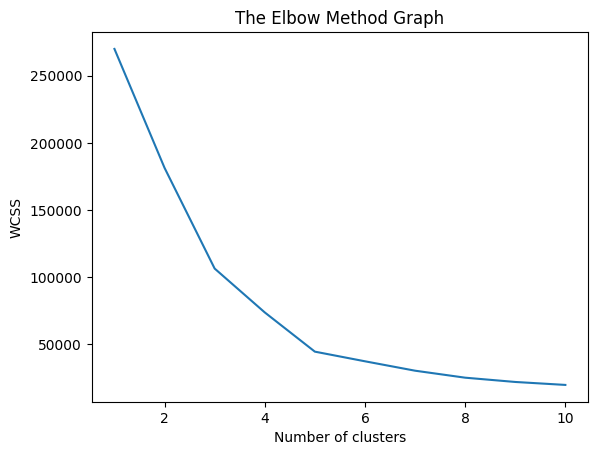

In [11]:
plt.plot(np.arange(1,11),wcss) # for loop range
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.

In [12]:
# implementing best k-means algorithm
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# predicting customer cluster
y_kmeans = kmeans.fit_predict(X)

Visualization

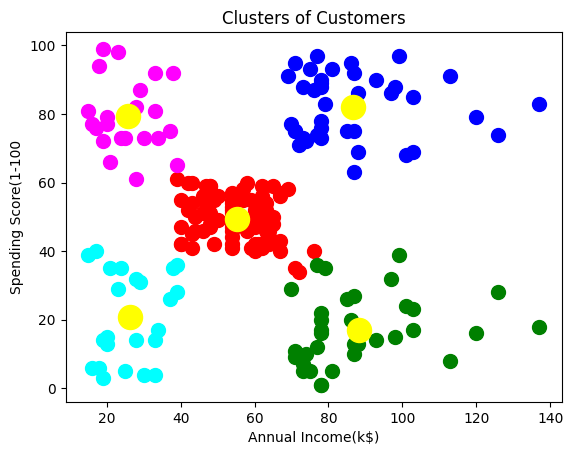

In [13]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

Sources:

- https://www.geeksforgeeks.org/hierarchical-clustering/
- https://www.displayr.com/what-is-dendrogram/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html
- https://www.statistics.com/glossary/wards-linkage/#:~:text=The%20linkage%20function%20specifying%20the,in%20ESS%20at%20each%20step.
- https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- https://www.geeksforgeeks.org/k-means-clustering-introduction/
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html